In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 
        'koi_impact',
        'koi_duration',
        'koi_depth', 
        'koi_prad', 
       'koi_teq', 'koi_insol', 
       'koi_model_snr',  'koi_steff', 
        'koi_slogg', 
       'koi_srad',  
       'koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
target = df["koi_disposition" ]


In [8]:
selected_features_dummies = pd.get_dummies(selected_features)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features_dummies, target, random_state=42)

In [10]:
 y_train.head()

6122         CANDIDATE
6370    FALSE POSITIVE
2879    FALSE POSITIVE
107          CONFIRMED
29           CANDIDATE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [12]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [13]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model


In [14]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_categorical)
    train_score = knn.score(X_train_scaled, y_train_categorical)
    test_score = knn.score(X_test_scaled, y_test_categorical)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.788
k: 3, Train/Test Score: 0.893/0.796
k: 5, Train/Test Score: 0.859/0.801
k: 7, Train/Test Score: 0.849/0.801
k: 9, Train/Test Score: 0.844/0.807
k: 11, Train/Test Score: 0.839/0.809
k: 13, Train/Test Score: 0.837/0.813
k: 15, Train/Test Score: 0.833/0.810
k: 17, Train/Test Score: 0.832/0.805
k: 19, Train/Test Score: 0.827/0.807


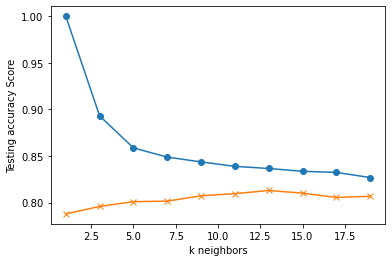

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train_categorical)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_categorical))

k=17 Test Acc: 0.805


In [18]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train_categorical)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test_categorical)}")

Training Data Score: 0.8323478924279992
Testing Data Score: 0.8054919908466819


In [48]:
predicted = knn.predict(X_test_scaled)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# find the parameters for this model

knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [42]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV
param_grid = {
              'leaf_size': [2,5],
              'n_jobs' : [-1],
         'p' : [1, 10],
            
             'weights': ['uniform'],
'metric': ('minkowski', 'chebyshev')}
grid = GridSearchCV(knn, param_grid, verbose=2)

In [43]:
grid.fit(X_train_scaled, y_train_categorical)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=1, weights=uniform; total time=   0.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=1, weights=uniform; total time=   0.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=1, weights=uniform; total time=   0.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=1, weights=uniform; total time=   0.2s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=1, weights=uniform; total time=   0.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=10, weights=uniform; total time=   1.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=10, weights=uniform; total time=   1.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=10, weights=uniform; total time=   1.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=10, weights=uniform; total time=   1.3s
[CV] END leaf_size=2, metric=minkowski, n_jobs=-1, p=10, weights=uniform; total time=   1.3s
[CV] END leaf_s

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'leaf_size': [2, 5],
                         'metric': ('minkowski', 'chebyshev'), 'n_jobs': [-1],
                         'p': [1, 10], 'weights': ['uniform']},
             verbose=2)

In [44]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 2, 'metric': 'minkowski', 'n_jobs': -1, 'p': 1, 'weights': 'uniform'}
0.8128890473660848


In [54]:
knn = grid

In [55]:
knn.predict (X_test_scaled)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# Save the Model

In [56]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'fatmabutun_knn.sav'
joblib.dump(knn, filename)

['fatmabutun_knn.sav']